In [1]:
# Dependencies and Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func
from pandas import DataFrame
from datetime import timedelta
import datetime
from flask import Flask, jsonify

In [2]:
path_file3 = "/Users/pooja/Documents/SQL_HW2/hawaii_stations.csv"
station_df = pd.read_csv(path_file3, encoding="ISO-8859-1")


station_df = station_df.reset_index(drop=True)

station_df

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [3]:
path_file4 = "/Users/pooja/Documents/SQL_HW2/clean_hawaii_measurements.csv"
meas_df = pd.read_csv(path_file4, encoding="ISO-8859-1")

meas_df['id']=meas_df.index

meas_df['id']=meas_df['id']+1


meas_df.head()


,station,date,prcp,tobs,id
0,USC00519397,2010-01-01,0.08,65,1
1,USC00519397,2010-01-02,0.00,63,2
2,USC00519397,2010-01-03,0.00,74,3
3,USC00519397,2010-01-04,0.00,76,4
4,USC00519397,2010-01-07,0.06,70,5


In [4]:
# Dependencies and boilerplate for Sql alchemy and sqlite 
from sqlalchemy import Column, Float, Integer, String
from sqlalchemy.ext.declarative import declarative_base

Base = declarative_base()

In [5]:

### BEGIN SOLUTION
from sqlalchemy import create_engine
from sqlalchemy.orm import Session

engine = create_engine("sqlite:///hawaii4.sqlite")
#Base.metadata.create_all(engine)

session = Session(bind=engine)
### END SOLUTION

In [6]:
class Measurement(Base):
    __tablename__ = "Measurement"
    
    id = Column(Integer, primary_key=True)
    station = Column(String)
    date = Column(String) 
    prcp = Column(Float) 
    tobs = Column(Integer) 
    
    
class Station(Base):
    __tablename__ = "Station"
    
    station = Column(String, primary_key=True)
    name = Column(String)
    latitude = Column(Float) 
    longitude = Column(Float) 
    elevation = Column(Float) 
      

In [7]:
Base.metadata.create_all(engine)

In [8]:
meas_df.to_sql('Measurement', engine, if_exists='replace', index=False)

In [9]:
station_df.to_sql('Station', engine, if_exists='replace', index=False)

In [13]:
AutomapBase = automap_base()
AutomapBase.prepare(engine, reflect=True)

In [14]:
AutomapBase.classes.keys()

['Measurement', 'Station']

In [15]:
Measurement = AutomapBase.classes.Measurement

In [16]:
Station = AutomapBase.classes.Station 

In [17]:
session = Session(engine)

# Climate Analysis

In [22]:
session.query()

In [23]:
resoverall= session.query(Measurement.date, func.avg(Measurement.prcp)).group_by(Measurement.date).\
having(Measurement.date>='2016-08-01').all()


In [24]:
prcp_df= pd.read_sql('select date, avg(prcp) as avg_per_day from Measurement group by(date) having (date>="2016-08-01")', engine, index_col='date')

In [25]:
prcp_df

,avg_per_day
date,
2016-08-01,1.742000
2016-08-02,0.405714
2016-08-03,0.008333
2016-08-04,0.362000
2016-08-05,0.068000
2016-08-06,0.062500
2016-08-07,0.556667
2016-08-08,0.110000
2016-08-09,0.098333


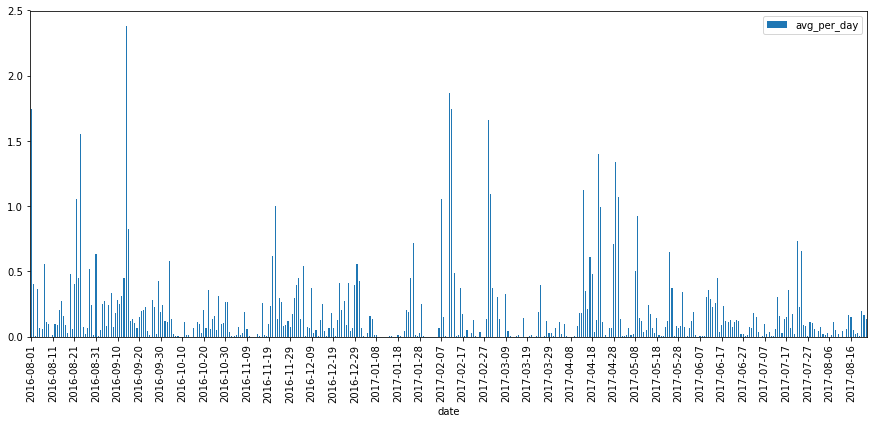

In [26]:
n = 10

# ax = locks.plot(kind='bar', y='SUM')


ax = prcp_df.plot( y='avg_per_day',kind ='bar', use_index=True, figsize=(15,6))
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])

# ax.figure.show()



 #xticks =['2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01','2017-03-01','2017-04-01','2017-05-01','2017-06-01','2017-07-01','2017-08-01']

#ax.set_xticks(ax.get_xticks()[::2])



plt.show()

# Station Analysis 

In [27]:
session.query()


In [28]:
session.query(func.count(Station.station)).all()


[(9)]

In [29]:
# List the stations and observation counts in descending order

session.query(Measurement.station , func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [30]:
# display the station with the highest Tobs counts 
session.query(Measurement.station , func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).first()

('USC00519281', 2772)

In [31]:
# Past 12 months of Tobs data 
session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.date>='2016-08-01').all()

[('USC00519397', '2016-08-01', 77),
 ('USC00519397', '2016-08-02', 78),
 ('USC00519397', '2016-08-03', 80),
 ('USC00519397', '2016-08-04', 80),
 ('USC00519397', '2016-08-05', 80),
 ('USC00519397', '2016-08-06', 80),
 ('USC00519397', '2016-08-07', 77),
 ('USC00519397', '2016-08-08', 81),
 ('USC00519397', '2016-08-09', 80),
 ('USC00519397', '2016-08-10', 80),
 ('USC00519397', '2016-08-11', 80),
 ('USC00519397', '2016-08-12', 79),
 ('USC00519397', '2016-08-13', 79),
 ('USC00519397', '2016-08-14', 79),
 ('USC00519397', '2016-08-15', 79),
 ('USC00519397', '2016-08-16', 80),
 ('USC00519397', '2016-08-17', 78),
 ('USC00519397', '2016-08-18', 80),
 ('USC00519397', '2016-08-19', 77),
 ('USC00519397', '2016-08-20', 80),
 ('USC00519397', '2016-08-21', 76),
 ('USC00519397', '2016-08-22', 77),
 ('USC00519397', '2016-08-23', 81),
 ('USC00519397', '2016-08-24', 79),
 ('USC00519397', '2016-08-25', 80),
 ('USC00519397', '2016-08-26', 79),
 ('USC00519397', '2016-08-27', 77),
 ('USC00519397', '2016-08-28

In [32]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs
session.query(Measurement.station,func.count(Measurement.tobs)).group_by(Measurement.station).filter(Measurement.date>='2016-08-01').all()


[('USC00513117', 365),
 ('USC00514830', 279),
 ('USC00516128', 346),
 ('USC00517948', 67),
 ('USC00519281', 374),
 ('USC00519397', 381),
 ('USC00519523', 336)]

In [33]:
# Filter by the station with the highest number of observations
session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).filter(Measurement.date>='2016-08-01').\
order_by(func.count(Measurement.tobs).desc()).first()



('USC00519397', 381)

In [34]:
tobs_df= pd.read_sql('select station, date, tobs from Measurement where(date>="2016-08-01")', engine)

In [35]:
tobs_df


,station,date,tobs
0,USC00519397,2016-08-01,77
1,USC00519397,2016-08-02,78
2,USC00519397,2016-08-03,80
3,USC00519397,2016-08-04,80
4,USC00519397,2016-08-05,80
5,USC00519397,2016-08-06,80
6,USC00519397,2016-08-07,77
7,USC00519397,2016-08-08,81
8,USC00519397,2016-08-09,80
9,USC00519397,2016-08-10,80


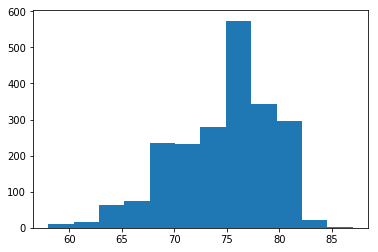

In [36]:
bins =12
plt.hist(tobs_df['tobs'], bins= bins, label= 'tobs')
plt.show()


# Temperature Analysis 

In [37]:
a = '2017-07-01'
b = '2017-07-15'

In [38]:
session.query( func.min(Measurement.tobs)).filter(Measurement.date.between(a,b)).all()

[(69)]

In [39]:

# defining the function for calc_temp

def calc_temp(A,B):
    min_value=session.query( func.min(Measurement.tobs)).filter(Measurement.date.between(A,B)).all()
    max_value=session.query( func.max(Measurement.tobs)).filter(Measurement.date.between(A,B)).all()
    avg_value=session.query( func.avg(Measurement.tobs)).filter(Measurement.date.between(A,B)).all()
    
    return (min_value, max_value, avg_value)
                            
                        


In [40]:
# Taking the user input 
start_date=input("Enter the start date in the format of %Y-%m-%d:")
end_date=input("Enter the end datein the format of %Y-%m-%d:")

                            

Enter the start date in the format of %Y-%m-%d:2017-01-01
Enter the end datein the format of %Y-%m-%d:2017-01-15


In [41]:
#Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures 
#for that range of dates.

start_date1 = datetime.datetime.strptime(start_date, "%Y-%m-%d")

end_date1 = datetime.datetime.strptime(end_date, "%Y-%m-%d")

calc_temp(start_date1, end_date1)

([(60)], [(78)], [(68.1891891891892)])

In [42]:
# Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates 
#from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

start_date2 = (datetime.datetime.strptime(start_date, "%Y-%m-%d"))+ datetime.timedelta(days=-365)

end_date2 = (datetime.datetime.strptime(end_date, "%Y-%m-%d"))+ datetime.timedelta(days=-365)


In [43]:
calc_temp(start_date2, end_date2)


([(62)], [(78)], [(69.56962025316456)])

In [44]:
# Data for Plotting 
mini = calc_temp(start_date2, end_date2)[0]
maxi=calc_temp(start_date2, end_date2)[1]
avg=calc_temp(start_date2, end_date2)[2]

In [45]:
print(mini[0][0])



62


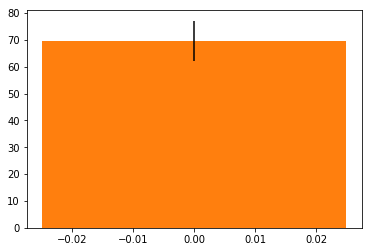

In [57]:
n=1

index=np.arange(n)

# y=69.62

temp_min=mini[0][0]
temp_max=maxi[0][0]
temp_avg=avg[0][0]

yerr=[(temp_avg-temp_min, temp_max-temp_avg)]



width=0.05

plt.bar(0, temp_avg, width, yerr=yerr)
plt.show()